# Bagging

Bagging (bootstrap agregation) é uma técnica de aprendizado de comitê, onde são utilizados os resultados de mais de um "sub" modelo para predizer um resultado final. 
Primeiro é selecionado um modelo de predição, KNN, SVM, LinearRegression, depois o método bagging particiona os dados de treino aleatoriamente e treina vários "sub" modelos com os sub conjuntos, ao final é levada em consideração a média dos valores alcançados pelos sub modelos (em caso de regressão) ou a opção com mais votos (classificação).
É bastante utilizado pois ajuda a reduzir o overfitting gerado pelos modelos comuns

## Exemplos

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification, make_regression

from sklearn.svm import SVR, SVC
from sklearn.ensemble import BaggingRegressor, BaggingClassifier

### Classificação

In [67]:
#Criando 3 classes
X, y = make_classification(n_samples = 1000, n_features = 5, n_informative=3, n_classes = 3, random_state=10)

In [68]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [90]:
#Criando modelo SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

svc_sc = svc.score(X_test, y_test)
print(svc_sc)

0.705


A pontuação não foi muito boa, vamos criar um bagging com o modelo SVC

In [91]:
bg_clf = BaggingClassifier(base_estimator=svc, #modelo base
                          n_estimators = 10, #número de "sub" modelos
                          max_samples = 0.8, #quantidade máxima de amostras por sub modelo
                          max_features = 1.0, #quantidade máxima de features por submodelo
                          random_state = 10
                          )

bg_clf.fit(X_train, y_train)

bg_sc = bg_clf.score(X_test, y_test)
print(bg_sc)

0.72


A pontuação continua não sendo perfeita, porém houve uma melhora

### Regressão

In [140]:
#Criando dados de regressão
X, y = make_regression(n_samples=100, n_features = 5, random_state=10)
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

In [144]:
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train, y_train)

y_hat = svr.predict(X_test)
svr.score(X_test, y_test)

0.908691928297278

In [159]:
bg_reg = BaggingRegressor(base_estimator=svr, #modelo base
                          n_estimators = 10, #número de "sub" modelos
                          max_samples = 1.0, #quantidade máxima de amostras por sub modelo
                          max_features = 1.0, #quantidade máxima de features por submodelo
                          random_state=4
                          )

bg_reg.fit(X_train, y_train)

bg_hat = bg_reg.predict(X_test)
bg_reg.score(X_test, y_test)

0.9148069982519473

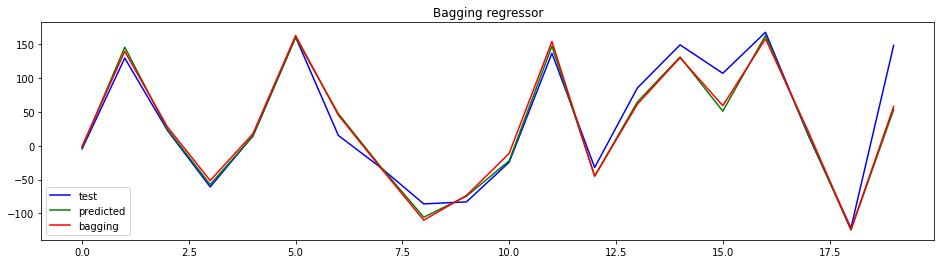

In [160]:
plt.figure(figsize=(16,4))
plt.title("Bagging regressor")
plt.plot(y_test, color='blue', label='test')
plt.plot(y_hat, color='green', label='predicted')
plt.plot(bg_hat, color='red', label='bagging')
plt.legend()
plt.show()